In [197]:
# trying out 1D image compression stuff

from scipy.fftpack import dct, idct
from scipy import interpolate
import numpy as np

In [23]:
array1 = np.array([4., 3., 5., 10., 5., 3.])

In [24]:
dct1 = dct(array1, norm='ortho')
print(dct1)

[12.24744871 -1.00596527 -4.          3.26598632  1.73205081 -1.82246185]


In [25]:
array1recov = idct(dct1, norm='ortho')

In [26]:
print(array1recov)

[ 4.  3.  5. 10.  5.  3.]


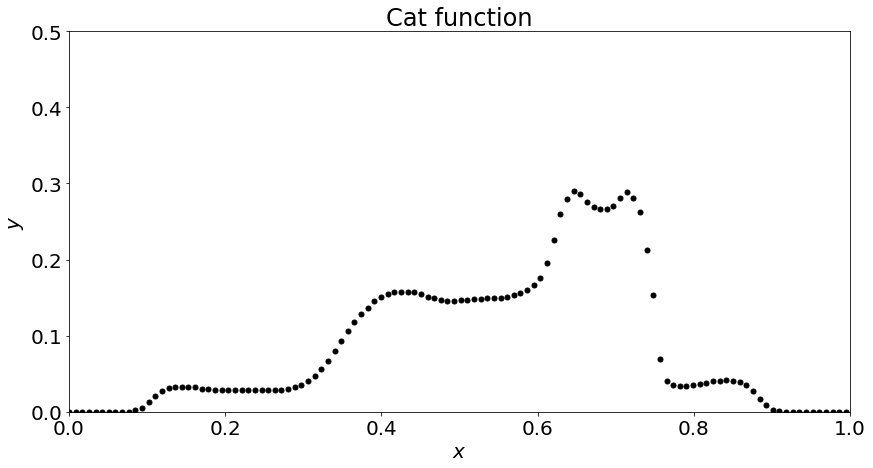

In [216]:
# initial cat function setup (array)

x = np.arange(0, 1, 0.0085)
y = np.zeros(x.shape[0])

# start of tail
y[10] = 0.002; y[11] = 0.005; y[12] = 0.013; y[13] = 0.021; y[14] = 0.027; y[15] = 0.031; y[16] = 0.033; y[17] = 0.033; y[18] = 0.033; y[19] = 0.032;

# tail dip
y[20] = 0.030; y[21] = 0.030; y[22] = 0.029; y[23] = 0.029; y[24] = 0.029; y[25:31] = 0.028;

# tail rise to haunches
y[31:33] = 0.029; y[33] = 0.030; y[34] = 0.032; y[35] = 0.035; y[36] = 0.040; y[37] = 0.047; y[38] = 0.056; y[39] = 0.067;

# haunch start
y[40] = 0.080; y[41] = 0.093; y[42] = 0.106; y[43] = 0.118; y[44] = 0.128; y[45] = 0.137; y[46] = 0.145; y[47] = 0.151; y[48] = 0.155; y[49] = 0.157;

# haunch dip to back
y[50:52] = 0.158; y[52] = 0.157; y[53] = 0.155; y[54] = 0.151; y[55] = 0.149; y[56] = 0.147; y[57:59] = 0.146; y[59] = 0.147;

# back slow rise to shoulder spike
y[60] = 0.147; y[61:63] = 0.148; y[63] = 0.149; y[64:66] = 0.150; y[66] = 0.151; y[67] = 0.153; y[68] = 0.156; y[69] = 0.160;

# shoulder spike to head
y[70] = 0.166; y[71] = 0.176; y[72] = 0.196; y[73] = 0.226; y[74] = 0.260; y[75] = 0.280; y[76] = 0.290; y[77] = 0.286; y[78] = 0.276; y[79] = 0.269;

# finish of head and fall to arms
y[80] = 0.266; y[81] = 0.267; y[82] = 0.271; y[83] = 0.281; y[84] = 0.289; y[85] = 0.281; y[86] = 0.263; y[87] = 0.213; y[88] = 0.153; y[89] = 0.070;

# arms transition to paw
y[90] = 0.040; y[91] = 0.035; y[92] = 0.034; y[93] = 0.034; y[94] = 0.035; y[95] = 0.036; y[96] = 0.038; y[97] = 0.040; y[98] = 0.041; y[99] = 0.042;

# last bit of paw
y[100] = 0.040; y[101] = 0.040; y[101] = 0.039; y[102] = 0.035; y[103] = 0.027; y[104] = 0.017; y[105] = 0.009; y[106] = 0.003; y[107] = 0.001;

plt.figure(figsize=(14,7))
plt.rcParams['font.size'] = 20

lines = plt.plot(x, y, 'o')

plt.setp(lines[0], markersize=5, color='k')

#plt.legend(('$y = -x^2 + 2x + 1$', '$y = x^2/2 + 2x + 1$'),
#           loc='upper right', bbox_to_anchor=(1.6, 0.95), fancybox=True, shadow=True)

plt.xlim(0,1)
plt.ylim(0,0.5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Cat function')
plt.show()

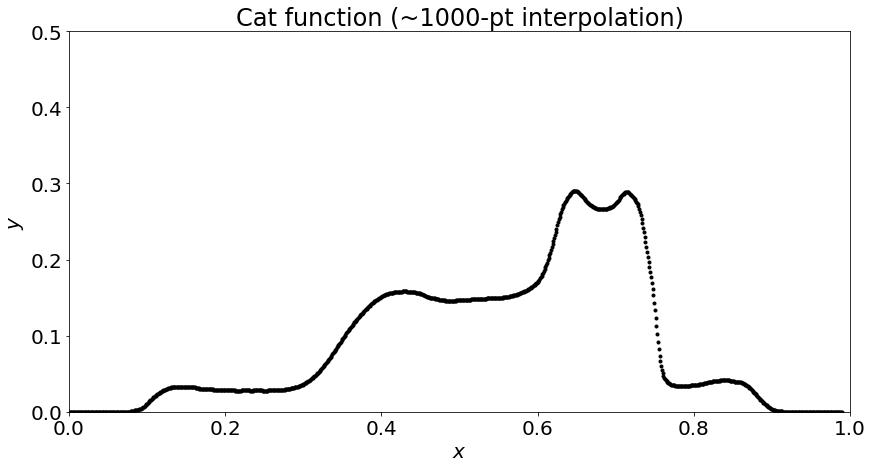

In [215]:
# creating interpolant
f = interpolate.interp1d(x, y, kind = 'cubic')

xfine = np.arange(0,0.99,0.001);
yfine = f(xfine);

plt.figure(figsize=(14,7))
plt.rcParams['font.size'] = 20

lines = plt.plot(xfine, yfine, 'o')

plt.setp(lines[0], markersize=3, color='k')

#plt.legend(('$y = -x^2 + 2x + 1$', '$y = x^2/2 + 2x + 1$'),
#           loc='upper right', bbox_to_anchor=(1.6, 0.95), fancybox=True, shadow=True)

plt.xlim(0,1)
plt.ylim(0,0.5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Cat function (~1000-pt interpolation)')
plt.show()

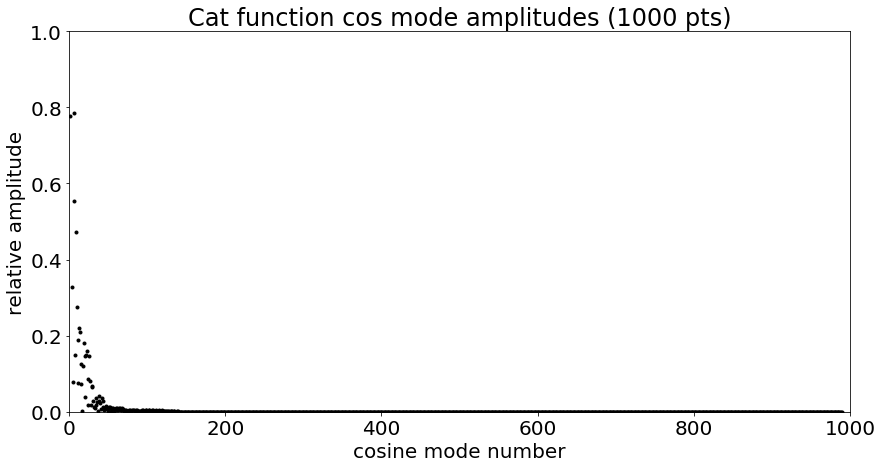

In [214]:
# dct of finely-resolved cat plot

dct_cat = dct(yfine, norm='ortho')
xmodeplot = np.arange(0,990,1)

plt.figure(figsize=(14,7))
plt.rcParams['font.size'] = 20

lines = plt.plot(xmodeplot, abs(dct_cat), 'o')

plt.setp(lines[0], markersize=3, color='k')

#plt.legend(('$y = -x^2 + 2x + 1$', '$y = x^2/2 + 2x + 1$'),
#           loc='upper right', bbox_to_anchor=(1.6, 0.95), fancybox=True, shadow=True)

plt.xlim(0,1000)
plt.ylim(0,1)
plt.xlabel('cosine mode number')
plt.ylabel('relative amplitude')
plt.title('Cat function cos mode amplitudes (1000 pts)')
plt.show()

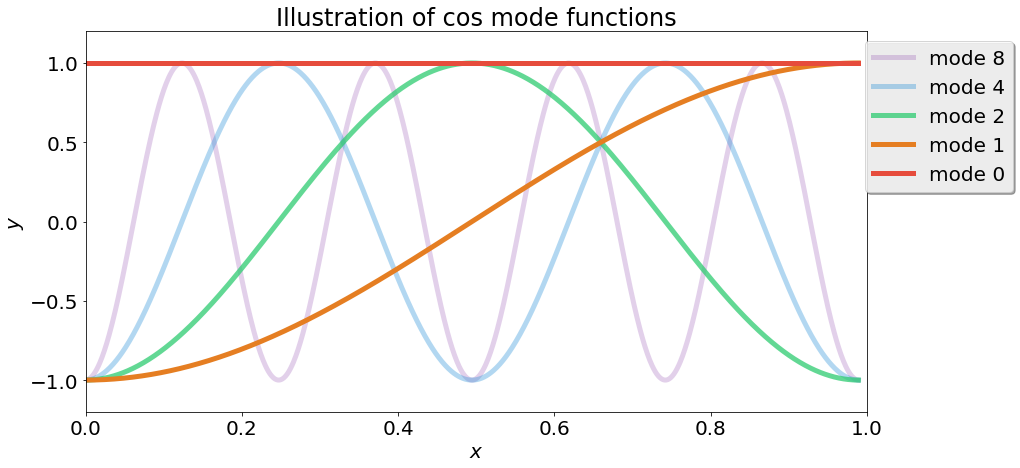

In [265]:
# mode illustration

dct_cat_mode0_ill = dct_cat.copy()
dct_cat_mode1_ill = dct_cat.copy()
dct_cat_mode2_ill = dct_cat.copy()
dct_cat_mode4_ill = dct_cat.copy()
dct_cat_mode8_ill = dct_cat.copy()

dct_cat_mode0_ill[1:] = 0
dct_cat_mode1_ill[0] = 0; dct_cat_mode1_ill[2:] = 0
dct_cat_mode2_ill[0:2] = 0; dct_cat_mode2_ill[3:] = 0
dct_cat_mode4_ill[0:4] = 0; dct_cat_mode4_ill[5:] = 0
dct_cat_mode8_ill[0:8] = 0; dct_cat_mode8_ill[9:] = 0

mode0_ill = idct(dct_cat_mode0_ill, norm='ortho'); mode0_ill = mode0_ill/np.max(abs(mode0_ill))
mode1_ill = idct(dct_cat_mode1_ill, norm='ortho'); mode1_ill = mode1_ill/np.max(abs(mode1_ill))
mode2_ill = idct(dct_cat_mode2_ill, norm='ortho'); mode2_ill = mode2_ill/np.max(abs(mode2_ill))
mode4_ill = idct(dct_cat_mode4_ill, norm='ortho'); mode4_ill = mode4_ill/np.max(abs(mode4_ill))
mode8_ill = idct(dct_cat_mode8_ill, norm='ortho'); mode8_ill = mode8_ill/np.max(abs(mode8_ill))

plt.figure(figsize=(14,7))
plt.rcParams['font.size'] = 20

lines = plt.plot(xfine, mode8_ill, \
                xfine, mode4_ill, \
                xfine, mode2_ill, \
                xfine, mode1_ill, \
                xfine, mode0_ill)

# Wisteria from materialui.co
plt.setp(lines[0], linewidth = 5, color = tuple(np.array([142, 68, 173, 64])/256))

# Peterriver from materialui.co
plt.setp(lines[1], linewidth = 5, color = tuple(np.array([52, 152, 219, 96])/256))

# Emerland from materialui.co
plt.setp(lines[2], linewidth = 5, color = tuple(np.array([46, 204, 113, 192])/256))

# Carrot from materialui.co
plt.setp(lines[3], linewidth = 5, color = tuple(np.array([230, 126, 34, 256])/256))

# Alizarin from materialui.co
plt.setp(lines[4], linewidth = 5, color = tuple(np.array([231, 76, 60, 256])/256))

plt.legend(('mode 8', 'mode 4', 'mode 2', 'mode 1', 'mode 0'),
          loc='upper right', bbox_to_anchor=(1.2, 1), fancybox=True, shadow=True)

plt.xlim(0,1)
plt.ylim(-1.2,1.2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Illustration of cos mode functions')
plt.show()